In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sys
import os
sys.path.append('../src/')

from data_utils import *

In [47]:
def draw_point_cloud(ax, points, axes=[0, 1, 2], point_size=0.1 ,xlim3d=None, ylim3d=None, zlim3d=None):
        """
        Convenient method for drawing various point cloud projections as a part of frame statistics.
        """
        axes_limits = [
            [-20, 80], #X axis range
            [-20, 20], #Y axis range
            [-3, 3]    #X axis range
        ]
        axes_str = ['X', 'Y', 'Z']
        ax.grid(False)
        
        ax.scatter(*np.transpose(points[:, axes]), s=point_size, c=points[:, 3], cmap='gray')
        ax.set_xlabel('{} axis'.format(axes_str[axes[0]]))
        ax.set_ylabel('{} axis'.format(axes_str[axes[1]]))
        if len(axes) > 2:
            ax.set_xlim3d(*axes_limits[axes[0]])
            ax.set_ylim3d(*axes_limits[axes[1]])
            ax.set_zlim3d(*axes_limits[axes[2]])
            ax.set_zlabel('{} axis'.format(axes_str[axes[2]]))
        else:
            ax.set_xlim(*axes_limits[axes[0]])
            ax.set_ylim(*axes_limits[axes[1]])
        # User specified limits
        if xlim3d!=None:
            ax.set_xlim3d(xlim3d)
        if ylim3d!=None:
            ax.set_ylim3d(ylim3d)
        if zlim3d!=None:
            ax.set_zlim3d(zlim3d)

In [48]:
DATA_PATH = '/home/ky/data/kitti/RawData/2011_09_26/2011_09_26_drive_0005_sync/'

points = read_point_cloud(os.path.join(DATA_PATH, 'velodyne_points/data/%010d.bin'%0))

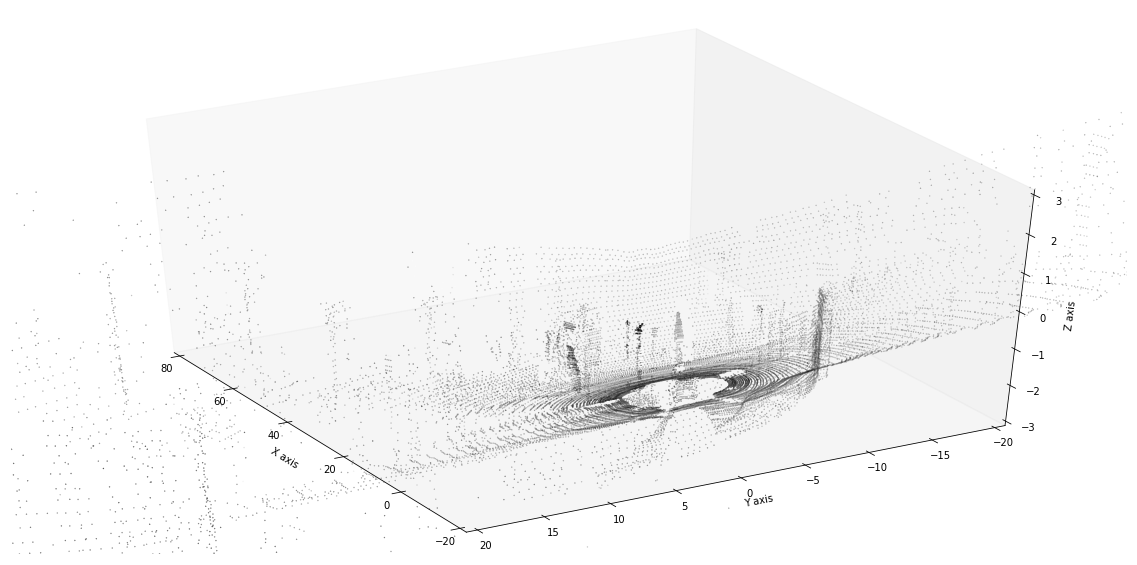

In [49]:
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, projection='3d')                    
    ax.view_init(40, 150)
    draw_point_cloud(ax, points[::5])

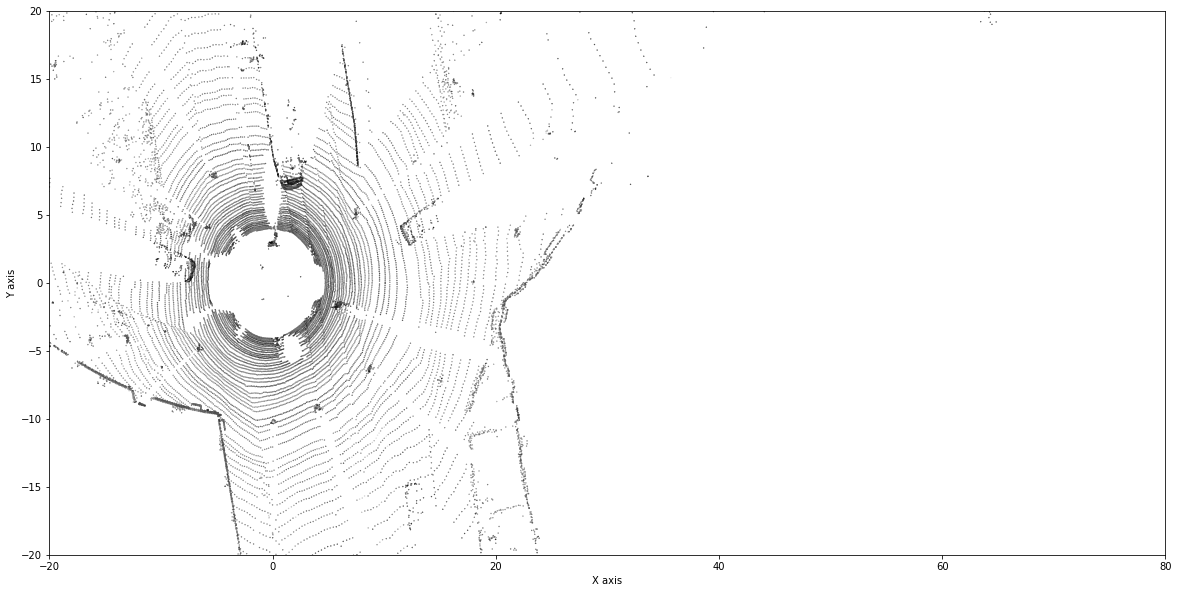

In [50]:
fig, ax = plt.subplots(figsize=(20, 10))
draw_point_cloud(ax, points[::5], axes=[0, 1])

In [51]:
df_tracking = read_tracking('/home/ky/data/kitti/tracking/training/label_02/0000.txt')
df_tracking

,frame,track_id,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,height,width,length,pos_x,pos_y,pos_z,rot_y
2,0,0,Car,0,0,-1.793451,296.744956,161.752147,455.226042,292.372804,2.000000,1.823255,4.433886,-4.552284,1.858523,13.410495,-2.115488
3,0,1,Cyclist,0,0,-1.936993,737.619499,161.531951,931.112229,374.000000,1.739063,0.824591,1.785241,1.640400,1.675660,5.776261,-1.675458
4,0,2,Pedestrian,0,0,-2.523309,1106.137292,166.576807,1204.470628,323.876144,1.714062,0.767881,0.972283,6.301919,1.652419,8.455685,-1.900245
7,1,0,Car,0,0,-1.796862,294.898777,156.024256,452.199718,284.621269,2.000000,1.823255,4.433886,-4.650955,1.766774,13.581085,-2.121565
8,1,1,Cyclist,0,0,-1.935205,745.017137,156.393157,938.839722,374.000000,1.739063,0.824591,1.785241,1.700640,1.640419,5.778596,-1.664456
9,1,2,Pedestrian,0,0,-2.530402,1138.342096,160.872449,1223.338201,324.146788,1.714062,0.767881,0.972283,6.352093,1.593046,8.156156,-1.886840
12,2,0,Car,0,0,-1.800343,293.093560,150.470149,449.259225,277.104290,2.000000,1.823255,4.433886,-4.749625,1.675025,13.751675,-2.127642
13,2,1,Cyclist,0,0,-1.933364,752.406083,151.248515,946.562490,374.000000,1.739063,0.824591,1.785241,1.760880,1.605178,5.780931,-1.653453
14,2,2,Pedestrian,0,0,-2.538744,1151.358043,154.633575,1223.691377,324.375836,1.714062,0.767881,0.972283,6.409693,1.533561,7.859055,-1.873436
17,3,0,Car,0,0,-1.803889,291.328036,145.082168,446.400830,269.811515,2.000000,1.823255,4.433886,-4.848295,1.583277,13.922264,-2.133719


In [52]:
def compute_3d_box_cam2(h, w, l, x, y, z, yaw):
    """
    Return : 3xn in cam2 coordinate
    """
    
    R = np.array([[np.cos(yaw), 0, np.sin(yaw)], [0, 1, 0], [-np.sin(yaw), 0, np.cos(yaw)]]) #rotation matrix
    x_corners = [l/2,l/2,-l/2,-l/2,l/2,l/2,-l/2,-l/2]
    y_corners = [0,0,0,0,-h,-h,-h,-h]
    z_corners = [w/2,-w/2,-w/2,w/2,w/2,-w/2,-w/2,w/2]
    corners_3d_cam2 = np.dot(R, np.vstack([x_corners,y_corners,z_corners]))
    corners_3d_cam2 += np.vstack([x,y,z])
    return corners_3d_cam2

In [53]:
def draw_box(ax, vertices, axes=[0, 1, 2], color='black'):
    """
    Draws a bounding 3D box in a pyplot axis.
    
    Parameters
    ----------
    pyplot_axis : Pyplot axis to draw in.
    vertices    : Array 8 box vertices containing x, y, z coordinates.
    axes        : Axes to use. Defaults to `[0, 1, 2]`, e.g. x, y and z axes.
    color       : Drawing color. Defaults to `black`.
    """
    vertices = vertices[axes, :]
    connections = [
        [0, 1], [1, 2], [2, 3], [3, 0],  # Lower plane parallel to Z=0 plane
        [4, 5], [5, 6], [6, 7], [7, 4],  # Upper plane parallel to Z=0 plane
        [0, 4], [1, 5], [2, 6], [3, 7]  # Connections between upper and lower planes
    ]
    for connection in connections:
        ax.plot(*vertices[:, connection], c=color, lw=0.5)

In [54]:
corners_3d_cam2 = compute_3d_box_cam2(*df_tracking.loc[2, ['height', 'width', 'length', 'pos_x', 'pos_y', 'pos_z', 'rot_y']])

In [55]:
corners_3d_cam2.shape

(3, 8)

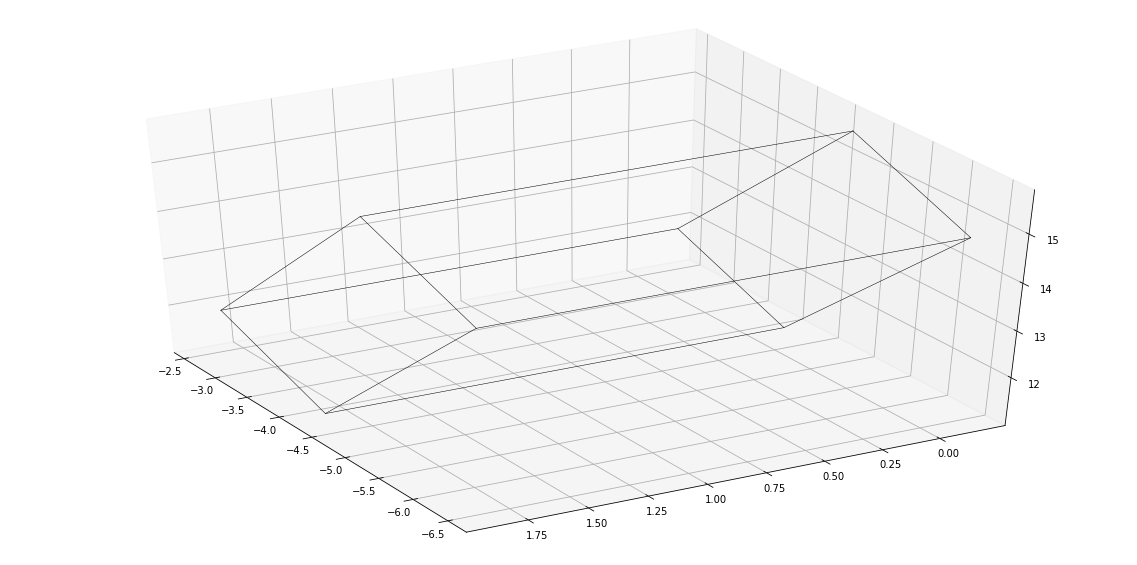

In [56]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')                    
ax.view_init(40, 150)
draw_box(ax, corners_3d_cam2)

In [57]:
from kitti_util import*

In [69]:
calib = Calibration('/home/ky/data/kitti/RawData/2011_09_26/', from_video=True)

corner_3d_velo = calib.project_rect_to_velo(corners_3d_cam2.T).T
corner_3d_velo

array([[ 15.12424719,  16.06928938,  12.27779014,  11.33274795,
         15.10334837,  16.04839056,  12.25689133,  11.31184914],
       [  6.49985556,   4.9406537 ,   2.64287284,   4.2020747 ,
          6.47872485,   4.91952299,   2.62174213,   4.18094399],
       [ -1.70710774,  -1.71370686,  -1.7776097 ,  -1.77101058,
          0.29267156,   0.28607244,   0.2221696 ,   0.22876872]])

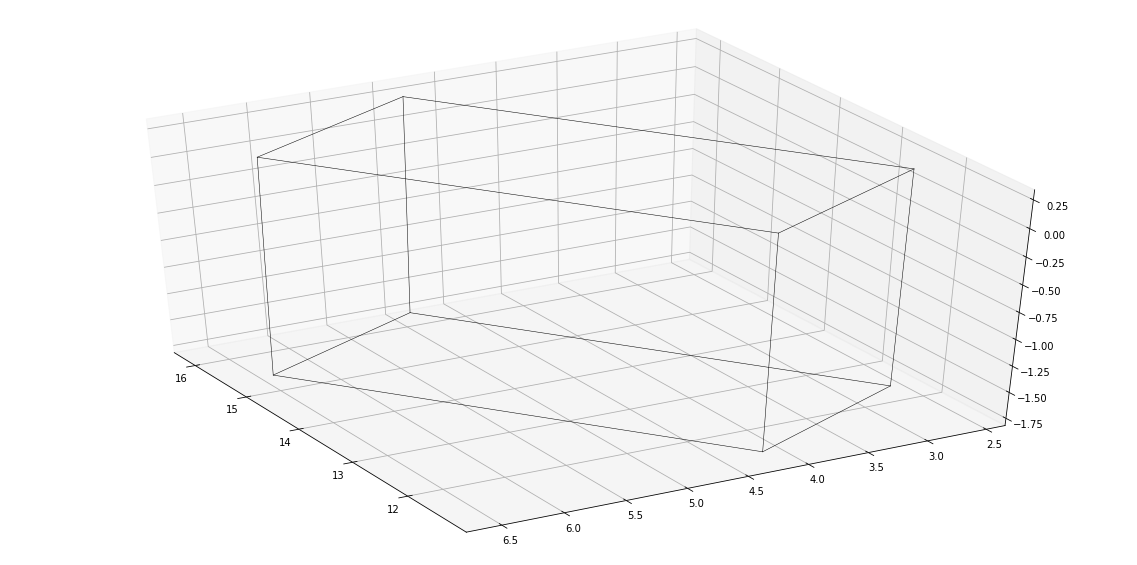

In [70]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40, 150)
draw_box(ax, corner_3d_velo)

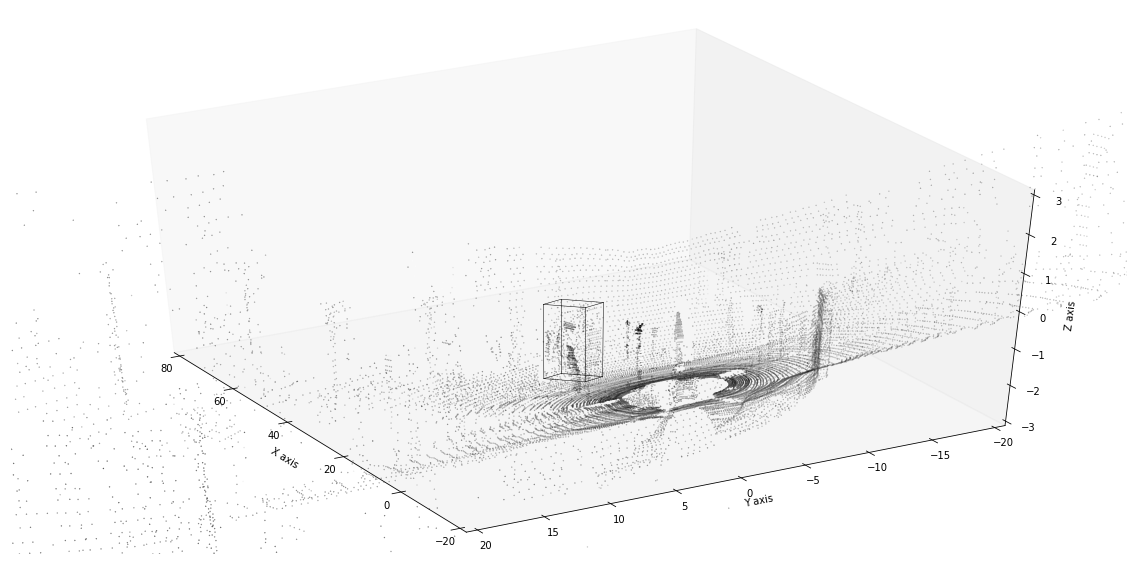

In [71]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40, 150)
draw_point_cloud(ax, points[::5]) #draw per 5 point
draw_box(ax, corner_3d_velo)

In [81]:
corner_3d_velo = corner_3d_velo.T

In [82]:
df_tracking = read_tracking

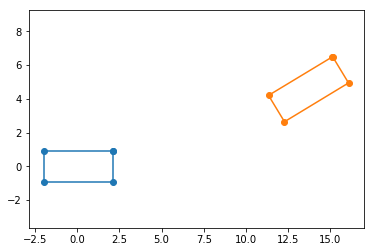

In [83]:
ego_car = np.array([[2.15, 0.9, -1.73], [2.15, -0.9, -1.73], [-1.95, -0.9, -1.73], [-1.95, 0.9, -1.73],
                    [2.15, 0.9, -0.23], [2.15, -0.9, -0.23], [-1.95, -0.9, -0.23], [-1.95, 0.9, -0.23]])
plt.axes().set_aspect('equal', 'datalim')
plt.plot(ego_car[:5, 0], ego_car[:5, 1], '-o')
plt.plot(corner_3d_velo[:5, 0], corner_3d_velo[:5, 1], '-o')

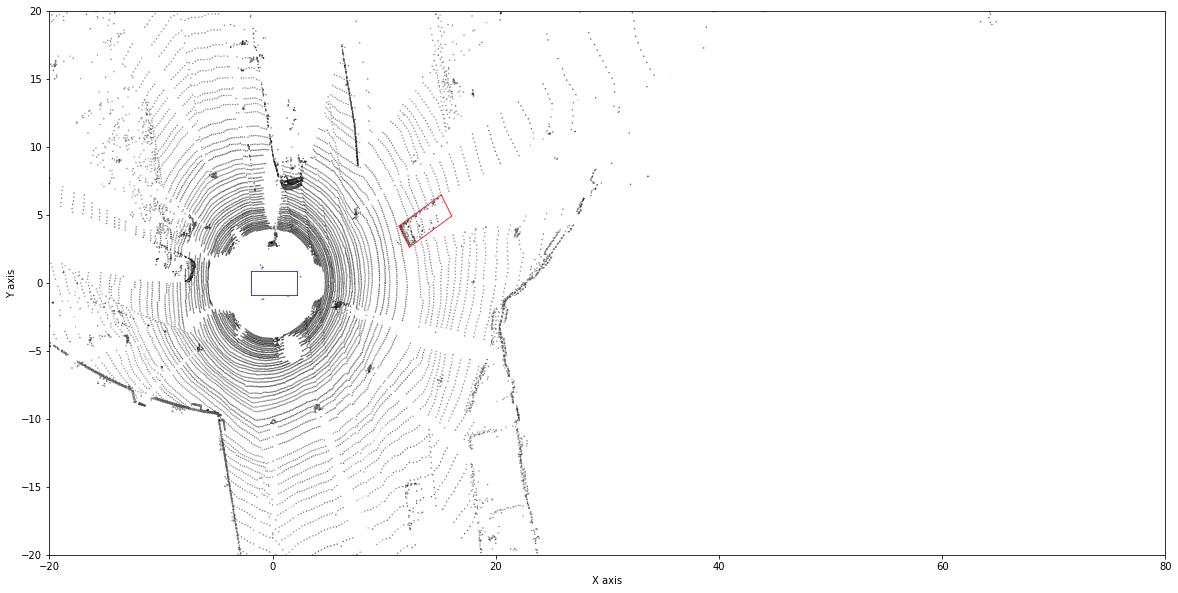

In [84]:
fig, ax = plt.subplots(figsize=(20, 10))
draw_point_cloud(ax, points[::5], axes=[0, 1])
draw_box(ax, corner_3d_velo.T, axes=[0,1], color='r')
draw_box(ax, ego_car.T, axes=[0,1], color='b')

In [85]:
def distance_point_to_segment(P, A, B):
    """
    Calculates the min distance of a point P to a segment AB.
    Returns the point Q in AB on which the min distance is reached
    """
    AP = P-A
    BP = P-B
    AB = B-A
    if np.dot(AB, AP)>=0 and np.dot(-AB, BP)>=0:
        return np.abs(np.cross(AP, AB))/np.linalg.norm(AB), np.dot(AP, AB)/np.dot(AB, AB) * AB + A
    d_PA = np.linalg.norm(AP)
    d_PB = np.linalg.norm(BP)
    if d_PA < d_PB:
        return d_PA, A
    return d_PB, B

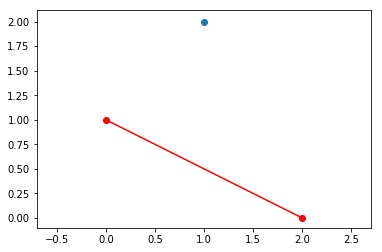

In [88]:
P = np.array([1, 2], dtype=np.float64)
A = np.array([0, 1], dtype=np.float64)
B = np.array([2, 0], dtype=np.float64)

plt.axes().set_aspect('equal', 'datalim')
plt.scatter(P[0], P[1])
plt.plot(zip(A,B)[0], zip(A, B)[1], 'r-o')


In [89]:
distance_point_to_segment(P, A, B)

(1.3416407864998738, array([ 0.4,  0.8]))

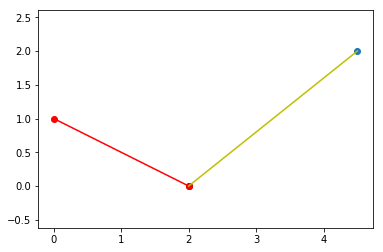

In [91]:
P = np.array([4.5, 2], dtype=np.float64)
A = np.array([0, 1], dtype=np.float64)
B = np.array([2, 0], dtype=np.float64)
d, Q = distance_point_to_segment(P, A, B)

plt.axes().set_aspect('equal', 'datalim')
plt.scatter(P[0], P[1])
plt.plot(zip(A, B)[0], zip(A, B)[1], 'r-o')
plt.scatter(Q[0], Q[1], c='k')
plt.plot(zip(P, Q)[0], zip(P, Q)[1], 'y-')

In [92]:
def min_distance_cuboids(cub1, cub2):
    """
    Computes the minimum distance between two non overlapping cuboids (3D) of shape (8, 3)
    They are projected to BEV and the minimum distance of the two rectangles are returned.
    """
    
    minD = 1e5
    for i in range(4):
        for j in range(4):
            d, Q = distance_point_to_segment(cub1[i, :2],  cub2[j, :2], cub2[j+1, :2])
            if d < minD:
                minD = d
                minP = ego_car[i, :2]
                minQ = Q
    for i in range(4):
        for j in range(4):
            d, Q = distance_point_to_segment(cub2[i, :2],  cub1[j, :2], cub1[j+1, :2])
            if d < minD:
                minD = d
                minP = corner_3d_velo_3d_[i, :2]
                minQ = Q
    return minP, minQ, minD

9.75840956934


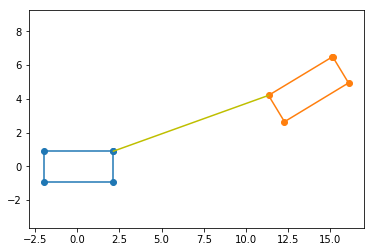

In [94]:
plt.axes().set_aspect('equal', 'datalim')
plt.plot(ego_car[:5, 0], ego_car[:5, 1], '-o')
plt.plot(corner_3d_velo[:5, 0], corner_3d_velo[:5, 1], '-o')
minP, minQ, minD = min_distance_cuboids(ego_car, corner_3d_velo)
plt.plot(zip(minP, minQ)[0], zip(minP, minQ)[1], 'y-')
print(minD)